In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch


# First Fig

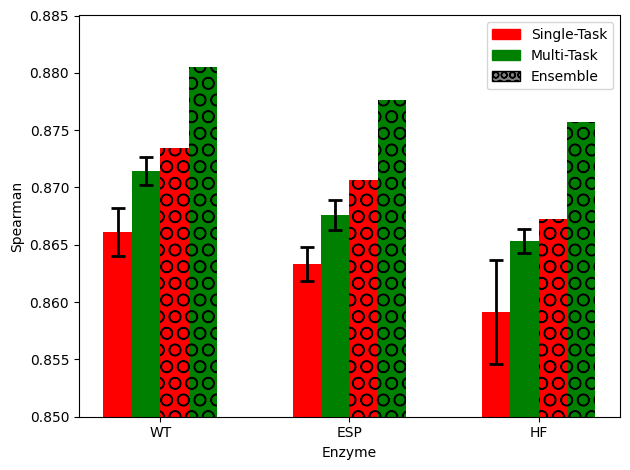

In [42]:
# Adjusted sample data to match the new order
data = {
    'WT': [(0.866129327, 0.002073498), (0.871410252, 0.001224376), (0.873438202, None), (0.880479122, None)],
    'ESP': [(0.863328868, 0.001447701), (0.867588501, 0.001287511), (0.870692818, None), (0.877605318, None)],
    'HF': [(0.859150978, 0.004511548), (0.865328354, 0.001006483), (0.867265678, None), (0.875705564, None)],
}

approaches = ['ST No Ens', 'MT No Ens', 'ST Ens', 'MT Ens']

# Plot setup
num_enzymes = len(data)
num_approaches = len(approaches)
index = np.arange(num_enzymes)  # Enzyme indices
bar_width = 0.15  # Width of a single bar

fig, ax = plt.subplots()

# Colors and patterns adjusted for the new order
colors = ['red', 'green', 'red', 'green']
hatch_patterns = ['', '', 'O', 'O']  # Circles for ensemble

for i, approach in enumerate(approaches):
    means = [data[enzyme][i][0] for enzyme in data]
    stds = [data[enzyme][i][1] if data[enzyme][i][1] is not None else 0 for enzyme in data]
    bars = ax.bar(index + i*bar_width, means, bar_width, color=colors[i], 
                  label=approach, hatch=hatch_patterns[i])
    # Add error bars only if standard deviation is provided
    error_config = {'elinewidth': 2, 'capsize': 5, 'capthick': 2, 'fmt': 'none', 'color': 'black'}
    for j, std in enumerate(stds):
        if std > 0:  # Check if std is not zero, indicating it was provided
            ax.errorbar(index[j] + i*bar_width, means[j], yerr=std, **error_config)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Enzyme')
ax.set_ylabel('Spearman')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(list(data.keys()))

# Custom legend for task and ensemble type, with adjustments
legend_elements = [
    mpatches.Patch(color='red', label='Single-Task'),
    mpatches.Patch(color='green', label='Multi-Task'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='OO', label='Ensemble')
]
ax.legend(handles=legend_elements, loc='upper right')

ax.set_ylim(0.850, 0.885)
plt.tight_layout()
plt.show()

# More Figs

## TL Comparison

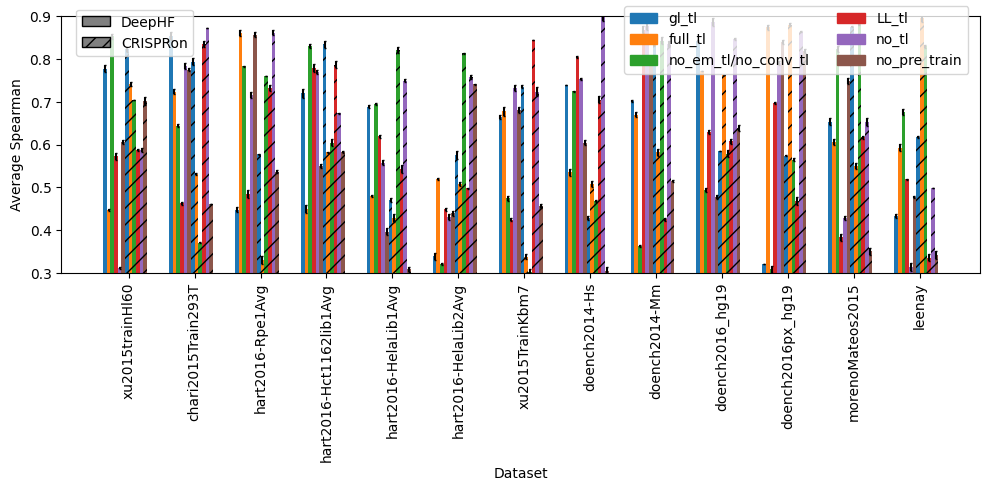

In [43]:
# Example datasets and categories
datasets = ['xu2015trainHl60', 'chari2015Train293T', 'hart2016-Rpe1Avg', 'hart2016-Hct1162lib1Avg', 'hart2016-HelaLib1Avg', 'hart2016-HelaLib2Avg', 'xu2015TrainKbm7', 'doench2014-Hs', 'doench2014-Mm','doench2016_hg19', 'doench2016px_hg19','morenoMateos2015', 'leenay']
categories = ['gl_tl', 'full_tl', 'no_em_tl', 'LL_tl', 'no_tl', 'no_pre_train']

# Mean Spearman scores for two models (normal and with 'OO' texture)
data_means_deephf = {
    # random numbers between 0.3 and 0.9
    'gl_tl': np.random.rand(13)*0.6 + 0.3,
    'full_tl': np.random.rand(13)*0.6 + 0.3,
    'no_em_tl': np.random.rand(13)*0.6 + 0.3,
    'LL_tl': np.random.rand(13)*0.6 + 0.3,
    'no_tl': np.random.rand(13)*0.6 + 0.3,
    'no_pre_train': np.random.rand(13)*0.6 + 0.3,
}

data_means_crispron = {
    'gl_tl': np.random.rand(13)*0.6 + 0.3,
    'full_tl': np.random.rand(13)*0.6 + 0.3,
    'no_em_tl': np.random.rand(13)*0.6 + 0.3,
    'LL_tl': np.random.rand(13)*0.6 + 0.3,
    'no_tl': np.random.rand(13)*0.6 + 0.3,
    'no_pre_train': np.random.rand(13)*0.6 + 0.3,

}

# Standard deviations for each category
data_stds_deephf = {
    'gl_tl': np.random.rand(13)*0.01,
    'full_tl':  np.random.rand(13)*0.01,
    'no_em_tl':  np.random.rand(13)*0.01,
    'LL_tl':  np.random.rand(13)*0.01,
    'no_tl':  np.random.rand(13)*0.01,
    'no_pre_train':  np.random.rand(13)*0.01,
}

data_stds_deephf_crispron = {
    'gl_tl':  np.random.rand(13)*0.01,
    'full_tl':  np.random.rand(13)*0.01,
    'no_em_tl':  np.random.rand(13)*0.01,
    'LL_tl':  np.random.rand(13)*0.01,
    'no_tl':  np.random.rand(13)*0.01,
    'no_pre_train':  np.random.rand(13)*0.01,
}


hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']



num_datasets = len(datasets)
num_categories = len(categories)
total_width = 10
single_width = total_width / (num_categories+3)
bar_width = single_width / 2  # half for normal, half for OO texture
index = np.arange(num_datasets) * total_width

# Plot bars for normal model
for i, category in enumerate(categories):
    plt.bar(index + i * bar_width, data_means_deephf[category], bar_width, 
            label=f'{category} (Normal)', yerr=data_stds_deephf[category], capsize=1, color = hex_colors[i])

# Plot bars for OO texture model with 'hatch' pattern
for i, category in enumerate(categories):
    plt.bar(index + (i+6) * bar_width , data_means_crispron[category], bar_width, 
            label=f'{category} (OO Texture)', hatch='//', yerr=data_stds_deephf_crispron[category], capsize=1, color = hex_colors[i])
# Add labels, title, and legend
plt.xlabel('Dataset')
plt.ylabel('Average Spearman')
plt.xticks(index-bar_width*2.5 + total_width / 2, datasets, rotation=90)


legend_1_elements = [
    mpatches.Patch(color=hex_colors[0], label='gl_tl'),
    mpatches.Patch(color=hex_colors[1], label='full_tl'),
    mpatches.Patch(color=hex_colors[2], label='no_em_tl/no_conv_tl'),
    mpatches.Patch(color=hex_colors[3], label='LL_tl'),
    mpatches.Patch(color=hex_colors[4], label='no_tl'),
    mpatches.Patch(color=hex_colors[5], label='no_pre_train'),]


legend_2_elements = [
    mpatches.Patch(facecolor='grey', edgecolor='k', label='DeepHF'),
    mpatches.Patch(facecolor='grey', edgecolor='k', hatch='//', label='CRISPRon')]

legend1 = plt.legend(handles=legend_1_elements, loc='lower center', bbox_to_anchor=(0.8, 0.75), ncol=2)

plt.gca().add_artist(legend1)

plt.legend(handles=legend_2_elements, loc='lower center', bbox_to_anchor=(0.08, 0.82), ncol=1)



# make figure bigger
plt.gcf().set_size_inches(10, 5)

# set y axis limits
plt.ylim(0.3, 0.9)
# make figure bigger

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## VS Other Methods

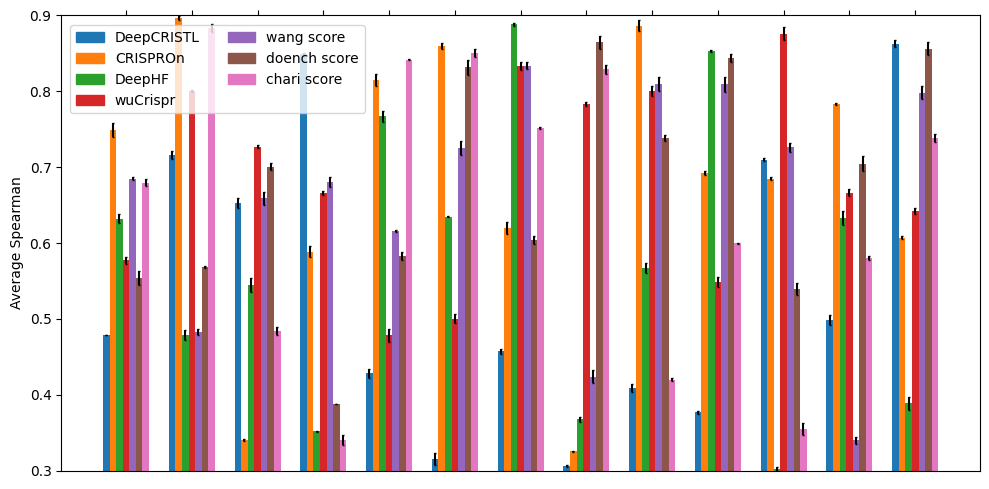

In [44]:
# Example datasets and categories
categories = ['DeepCRISTL', 'CRISPROn', 'DeepHF', 'wuCrispr', 'wang score', 'doench score', 'chari score']

# Mean Spearman scores for two models (normal and with 'OO' texture)
data_means = {
    'DeepCRISTL': np.random.rand(13)*0.6 + 0.3,
    'CRISPROn': np.random.rand(13)*0.6 + 0.3,
    'DeepHF': np.random.rand(13)*0.6 + 0.3,
    'wuCrispr': np.random.rand(13)*0.6 + 0.3,
    'wang score': np.random.rand(13)*0.6 + 0.3,
    'doench score': np.random.rand(13)*0.6 + 0.3,
    'chari score': np.random.rand(13)*0.6 + 0.3,
}



# Standard deviations for each category
data_stds = {
    'DeepCRISTL':  np.random.rand(13)*0.01,
    'CRISPROn':  np.random.rand(13)*0.01,
    'DeepHF':  np.random.rand(13)*0.01,
    'wuCrispr':  np.random.rand(13)*0.01, 
    'wang score':  np.random.rand(13)*0.01,
    'doench score':  np.random.rand(13)*0.01,
    'chari score':  np.random.rand(13)*0.01,
}




hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']



num_datasets = len(datasets)
num_categories = len(categories)
total_width = 10
single_width = total_width / (num_categories+3)
bar_width = single_width 
index = np.arange(num_datasets) * total_width

# Plot bars for normal model
for i, category in enumerate(categories):
    plt.bar(index + i * bar_width, data_means[category], bar_width, 
            label=f'{category} (Normal)', yerr=data_stds[category], capsize=1, color = hex_colors[i])

# Add labels, title, and legend
# show x label on top
#plt.xlabel('Dataset')
plt.ylabel('Average Spearman')
#plt.xticks(index-bar_width*2+ total_width / 2, datasets, rotation=90)
# same but xticks are above the bars
#plt.xticks(index-bar_width*2 + total_width / 2, None)
# remove xticks
plt.xticks([])


legend_elements = [
    mpatches.Patch(color=hex_colors[0], label='DeepCRISTL'),
    mpatches.Patch(color=hex_colors[1], label='CRISPROn'),
    mpatches.Patch(color=hex_colors[2], label='DeepHF'),
    mpatches.Patch(color=hex_colors[3], label='wuCrispr'),
    mpatches.Patch(color=hex_colors[4], label='wang score'),
    mpatches.Patch(color=hex_colors[5], label='doench score'),
    mpatches.Patch(color=hex_colors[6], label='chari score'),
]





plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.17, 0.77), ncol=2)

# make figure bigger
plt.gcf().set_size_inches(10, 5)

# set y axis limits
plt.ylim(0.3, 0.9)

# show x axis on top
plt.gca().xaxis.set_ticks_position('top')

plt.xticks(index-bar_width*2 + total_width / 2, [], rotation=90)



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()